<center>

## Term Project: Student Spending Habits
### Karthika Vellingiri
### 05 August 2024
</center>

## Statistical Analysis of Student Spending Behavior

**Dataset**: `https://www.kaggle.com/datasets/sumanthnimmagadda/student-spending-dataset`

This dataset contains fictional data representing the spending habits of 1000 students across various demographic groups and academic backgrounds.
The dataset includes information such as age, gender, year in school, major, monthly income, financial aid received, and expenses in different spending categories.Spending categories include tuition, housing, food, transportation, books & supplies, entertainment, personal care, technology, health & wellness, and miscellaneous expenses.
Additionally, the dataset includes the preferred payment method for each student.

**Question**: `How do demographic factors (such as age and gender), academic factors (including year in school and major), and financial factors (such as monthly income, financial aid, and tuition) influence students' spending behavior on essential and discretionary categories?`

To investigate the impact of various factors on students' spending behavior, we have selected key variables from our dataset. These variables are critical for understanding how different aspects of students' profiles affect their expenditure on essential and discretionary categories.

**Key Variables for Analysis**

``1) Age``:  
This variable indicates the student's age. Age can influence spending behavior, as students in different age groups may have distinct needs and financial priorities. By analyzing age, we can determine whether spending patterns on essential versus discretionary categories vary with the student's age.

``2) Gender``:  
Gender is a demographic factor that might affect spending habits. Examining gender differences helps us identify if there are significant variations in how male and female students allocate their spending across essential and discretionary categories.

``3) Year in School``:  
This variable represents the student's academic year (e.g., Freshman, Sophomore, etc.). Academic standing can influence financial priorities and spending behavior. Analyzing this variable allows us to explore how spending on essential versus discretionary categories changes as students progress through their academic career.

``4) Major``:  
The student’s field of study is captured by this variable. Different majors may correlate with varying levels of financial resources or priorities, affecting spending behavior. By examining this variable, we can understand if students in different majors spend differently on essential versus discretionary categories.

``5) Monthly Income``:  
This attribute represents the student’s monthly income. Monthly income directly impacts how students allocate their spending between essential and discretionary categories. Analyzing this variable helps us determine the influence of income on spending patterns.

``6) Financial Aid``:  
This variable indicates the amount of financial aid received. Financial aid can affect how much students need to spend from their own resources and can influence their spending behavior. Understanding this relationship helps us analyze how financial aid impacts spending on essentials versus discretionary items.

``7) Tuition``:  
Tuition costs represent the amount paid for education. High tuition fees may constrain students’ budgets, affecting their spending behavior. Analyzing the impact of tuition on spending can reveal whether students with higher tuition costs allocate their spending differently compared to those with lower tuition fees.

These variables were selected for their potential to impact student spending behavior significantly. By analyzing these factors, we aim to uncover patterns that reveal how different aspects of students' demographics, academic standing, and financial conditions shape their expenditure on essential versus discretionary categories. This analysis will provide insights to help in financial planning.ghts to help in financial planning.ghts to help in financial planning.ights to help in financial planning.ghts to help in financial planning.ghts to help in financial planning.ghts to help in financial planning.ghts to help in financial planning.sights to help in financial planning.sights to help in financial planning.Analysis of Student Spending BehaviorAnalysis of Student Spending Behaviorghts to help in financial planning and targeted support for students.

**Data Load, Clean and Identifying the outliers**

In [1013]:
import pandas as pd
import warnings
from IPython.display import display, HTML

# Suppress FutureWarnings to avoid cluttering output
warnings.simplefilter(action='ignore', category=FutureWarning)

def handle_outliers(df, column):
    """
    Function to handle outliers in a given column of a DataFrame using the IQR method.
    """
    # Calculate the first quartile (25th percentile) of the column
    Q1 = df[column].quantile(0.25)
    # Calculate the third quartile (75th percentile) of the column
    Q3 = df[column].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    # Define the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers based on the IQR method
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Determine if there are any outliers
    has_outliers = not outliers.empty

    # Remove outliers from the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df, has_outliers

def clean_data(file_path):
    """
    Function to load, clean, and preprocess the dataset from a CSV file.
    """
    # Load the dataset from the CSV file
    data = pd.read_csv(file_path)

    # Replace positive and negative infinity values with NaN
    data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

    # Remove rows with any null values
    data.dropna(inplace=True)

    # List of numeric columns to check for outliers
    numeric_columns = ['monthly_income', 'tuition', 'housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']
    
    # List to store columns with outliers
    outlier_columns = []
    for col in numeric_columns:
        if col in data.columns:
            # Handle outliers for the column
            data, has_outliers = handle_outliers(data, col)
            # Add column to list if outliers were found
            if has_outliers:
                outlier_columns.append(col)

    # Reset the DataFrame index after dropping rows
    data.reset_index(drop=True, inplace=True)

    # Set display options to show all columns and full column width
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.width', 1000)

    # Print a summary of which columns have outliers or if none were found
    if outlier_columns:
        print(f"Outlier found on: {', '.join(outlier_columns)}")
    else:
        print("No outliers found in the dataset.")

    # Display the first few rows of the cleaned dataset
    print("Cleaned Data Sample:")
    display(HTML(data.head().to_html()))

    return data

# Path to the dataset
file_path = 'student_spending.csv'
# Clean the data
cleaned_data = clean_data(file_path)


No outliers found in the dataset.
Cleaned Data Sample:


,S_no,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


### Creating Histogram for the Key Variables

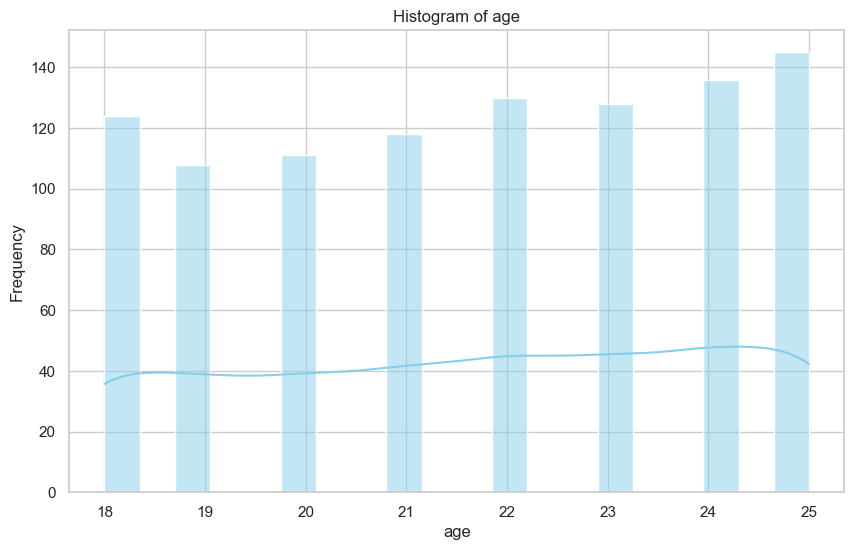


Descriptive Statistics for 'age':
Mean: 21.68
Median: 22.00
Mode: 25.00
Standard Deviation: 2.32
Variance: 5.39
Skewness: -0.12
Kurtosis: -1.24
First Quartile (Q1): 20.00
Third Quartile (Q3): 24.00
Interquartile Range (IQR): 4.00
Tails: Min = 18.00, Max = 25.00


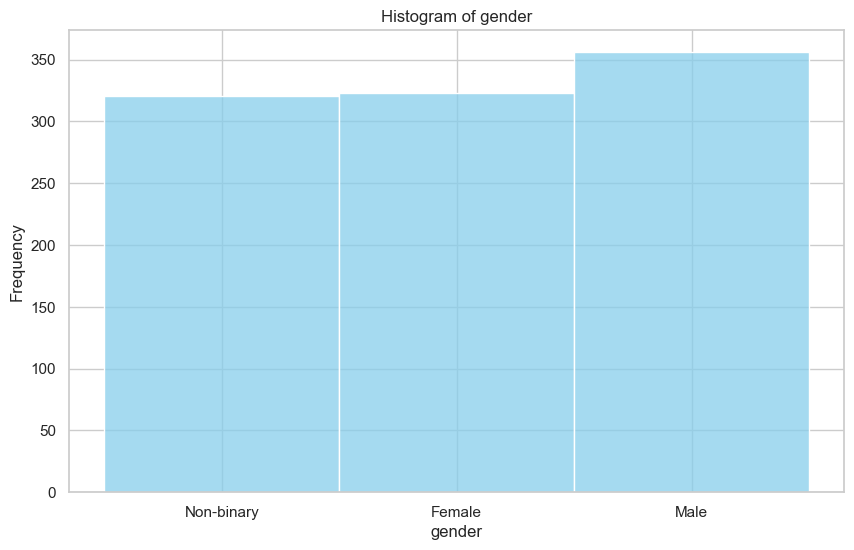


Descriptive Statistics for 'gender':
Mode: Male
Frequency of Mode: 356
Unique Values: 3
Missing Values: 0
Total Entries: 1000


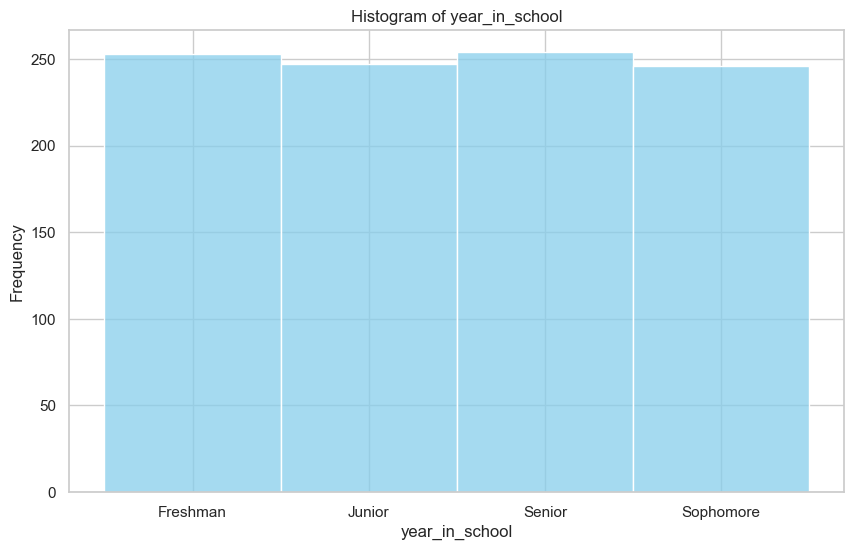


Descriptive Statistics for 'year_in_school':
Mode: Senior
Frequency of Mode: 254
Unique Values: 4
Missing Values: 0
Total Entries: 1000


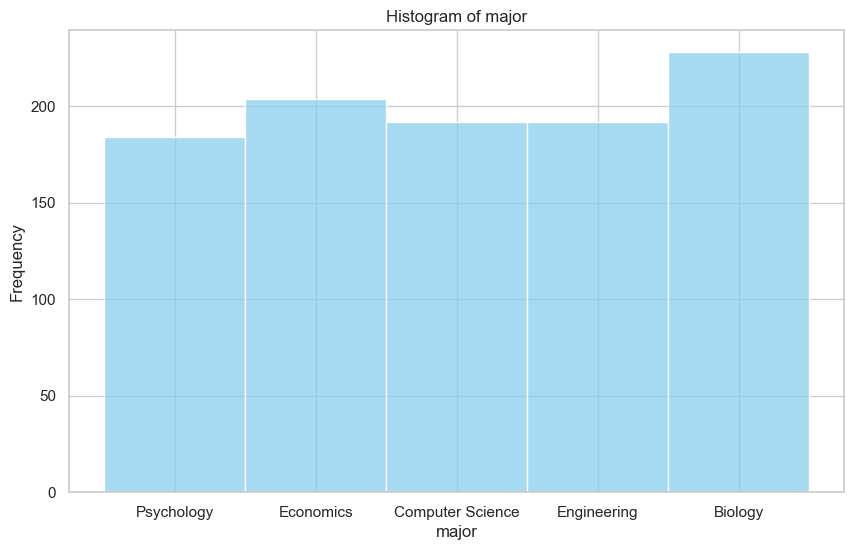


Descriptive Statistics for 'major':
Mode: Biology
Frequency of Mode: 228
Unique Values: 5
Missing Values: 0
Total Entries: 1000


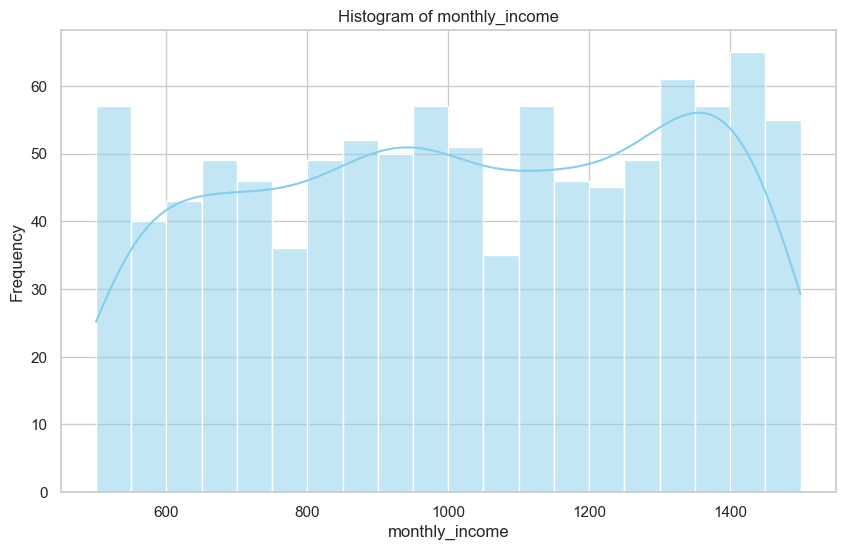


Descriptive Statistics for 'monthly_income':
Mean: 1020.65
Median: 1021.00
Mode: 1021.00
Standard Deviation: 293.84
Variance: 86342.63
Skewness: -0.09
Kurtosis: -1.21
First Quartile (Q1): 770.75
Third Quartile (Q3): 1288.25
Interquartile Range (IQR): 517.50
Tails: Min = 501.00, Max = 1500.00


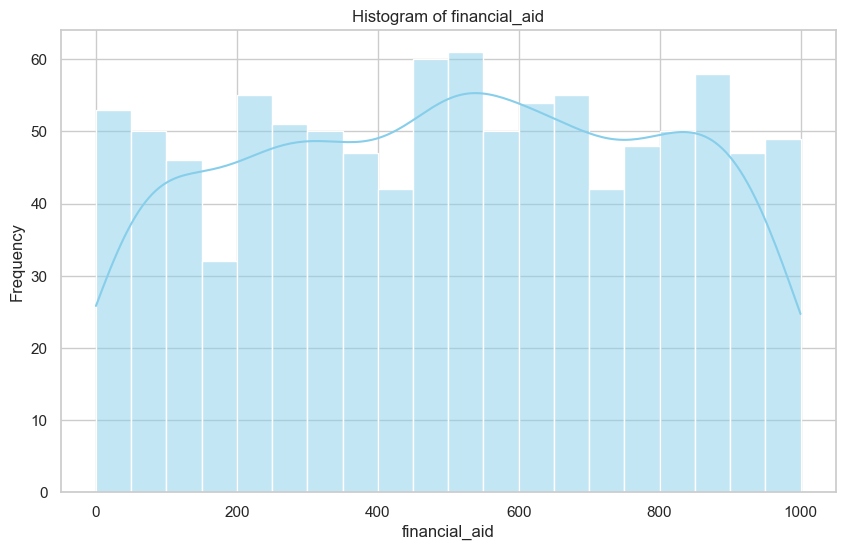


Descriptive Statistics for 'financial_aid':
Mean: 504.77
Median: 513.00
Mode: 387.00
Standard Deviation: 287.09
Variance: 82422.15
Skewness: -0.05
Kurtosis: -1.15
First Quartile (Q1): 261.00
Third Quartile (Q3): 751.50
Interquartile Range (IQR): 490.50
Tails: Min = 0.00, Max = 1000.00


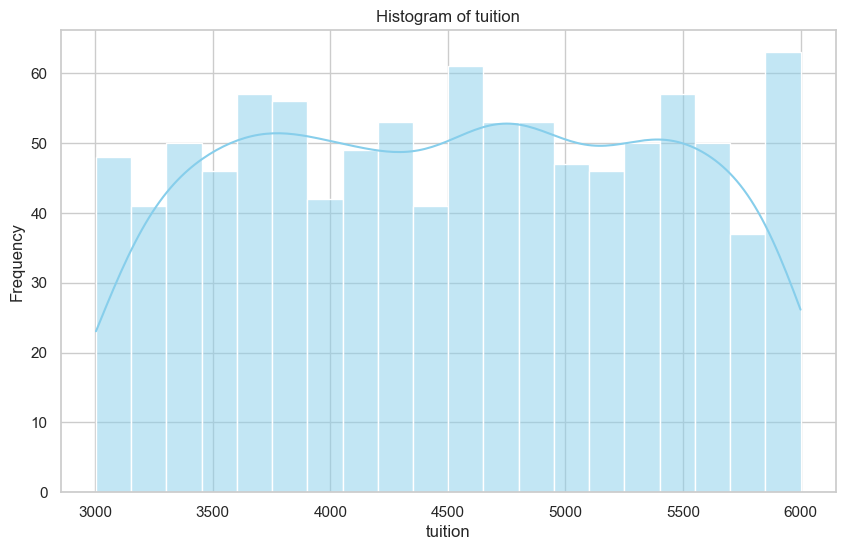


Descriptive Statistics for 'tuition':
Mean: 4520.40
Median: 4547.50
Mode: 5452.00
Standard Deviation: 860.66
Variance: 740732.10
Skewness: -0.01
Kurtosis: -1.18
First Quartile (Q1): 3779.75
Third Quartile (Q3): 5285.00
Interquartile Range (IQR): 1505.25
Tails: Min = 3003.00, Max = 6000.00


In [1015]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which to create histograms
columns_to_plot = ['age', 'gender', 'year_in_school', 'major', 'monthly_income', 'financial_aid', 'tuition']

def describe_and_plot(df, column_name):
    """
    Generate histogram with KDE and print descriptive statistics for a given column.
    """
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot

    # Plot histogram
    if pd.api.types.is_numeric_dtype(df[column_name]):  # Check if the column is numeric
        # Plot histogram with KDE for numeric data
        sns.histplot(df[column_name].dropna(), kde=True, color='skyblue', bins=20)  
        plt.title(f'Histogram of {column_name}')  # Set the title of the histogram
    else:  # Handle categorical data
        # Plot histogram without KDE for categorical data
        sns.histplot(df[column_name].dropna(), kde=False, color='skyblue', discrete=True)  
        plt.title(f'Histogram of {column_name}')  # Set the title of the histogram
    
    plt.xlabel(column_name)  # Label the x-axis with the column name
    plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
    plt.grid(True)  # Enable grid for the plot
    plt.show()  # Display the plot

    # Print descriptive statistics
    print(f"\nDescriptive Statistics for '{column_name}':")

    if pd.api.types.is_numeric_dtype(df[column_name]):  # Check if the column is numeric
        # Calculate and print various statistics for numeric data
        mean = df[column_name].mean()  # Mean of the column
        median = df[column_name].median()  # Median of the column
        mode = df[column_name].mode().values[0]  # Mode of the column
        std_dev = df[column_name].std()  # Standard deviation of the column
        variance = df[column_name].var()  # Variance of the column
        skewness = df[column_name].skew()  # Skewness of the column
        kurtosis = df[column_name].kurtosis()  # Kurtosis of the column
        q1 = df[column_name].quantile(0.25)  # First quartile (Q1)
        q3 = df[column_name].quantile(0.75)  # Third quartile (Q3)
        iqr = q3 - q1  # Interquartile range (IQR)
        tails = (df[column_name].min(), df[column_name].max())  # Minimum and maximum values

        # Print statistics
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Mode: {mode:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Skewness: {skewness:.2f}")
        print(f"Kurtosis: {kurtosis:.2f}")
        print(f"First Quartile (Q1): {q1:.2f}")
        print(f"Third Quartile (Q3): {q3:.2f}")
        print(f"Interquartile Range (IQR): {iqr:.2f}")
        print(f"Tails: Min = {tails[0]:.2f}, Max = {tails[1]:.2f}")
    else:  # Handle categorical data
        # Calculate and print statistics for categorical data
        mode = df[column_name].mode().values[0]  # Mode of the column
        frequency_of_mode = df[column_name].value_counts().max()  # Frequency of the mode
        unique_values = df[column_name].nunique()  # Number of unique values
        missing_values = df[column_name].isna().sum()  # Number of missing values
        total_entries = df[column_name].size  # Total number of entries

        # Print statistics
        print(f"Mode: {mode}")
        print(f"Frequency of Mode: {frequency_of_mode}")
        print(f"Unique Values: {unique_values}")
        print(f"Missing Values: {missing_values}")
        print(f"Total Entries: {total_entries}")

# Plot histograms and print statistics for specified columns
for column in columns_to_plot:
    describe_and_plot(cleaned_data, column)  # Call the function to plot histogram and print statistics


#### Summary for Histograms and Descriptive Characteristics

**1. Age**

**Histogram:**
The histogram of `age` illustrates the distribution of ages among the participants. This shows the overall spread and central tendency of ages in the dataset. The shape of the histogram indicates whether the age distribution is uniform, normal, skewed, or bimodal.

**Descriptive Statistics:**
- **Mean**: The average age of participants.
- **Median**: The middle value when all ages are sorted.
- **Mode**: The most frequently occurring age.
- **Standard Deviation**: The measure of variation in ages.
- **Variance**: The squared deviation of ages from the mean.
- **Skewness**: Indicates the asymmetry of the age distribution.
- **Kurtosis**: Describes the "tailedness" of the age distribution.
- **First Quartile (Q1)**: The age below which 25% of participants fall.
- **Third Quartile (Q3)**: The age below which 75% of participants fall.
- **Interquartile Range (IQR)**: The range between Q3 and Q1.
- **Tails**: The minimum and maximum age values.

**Outliers:**
No outliers found. The age data is within a typical range with no extreme values.

**2. Gender**

**Histogram:**
The histogram of `gender` displays the count of each gender category within the dataset. This indicates how gender is distributed among the participants and helps in understanding the balance or imbalance in gender representation.

**Descriptive Statistics:**
- **Mode**: The most frequent gender in the dataset.
- **Frequency of Mode**: The number of times the most frequent gender appears.
- **Unique Values**: Number of distinct genders recorded.
- **Missing Values**: Count of missing gender entries.
- **Total Entries**: Total number of entries in the gender column.

**Outliers:**
No outliers found. The gender data is categorical with no extreme values. 

**Note:** Mean and median are not applicable for categorical variables like gender, as these measures are used for numerical data.

**3. Year in School**

**Histogram:**
The histogram of `year_in_school` displays the distribution of students across different academic years. This shows how students are spread across various academic levels and helps identify if any year is over- or under-represented.

**Descriptive Statistics:**
- **Mode**: The academic year with the highest frequency.
- **Frequency of Mode**: The number of students in the most frequent academic year.
- **Unique Values**: Number of distinct academic years.
- **Missing Values**: Count of missing entries in the year_in_school column.
- **Total Entries**: Total number of entries in the year_in_school column.

**Outliers:**
No outliers found. The year in school data is categorical with no extreme values. 

**Note:** Mean and median are not applicable for categorical variables like year in school, as these measures are used for numerical data.

**4. Major**

**Histogram:**
The histogram of `major` indicates the number of students enrolled in each major. This shows how students are distributed across various majors and highlights any significant concentration in particular fields.

**Descriptive Statistics:**
- **Mode**: The most popular major among students.
- **Frequency of Mode**: The number of students in the most popular major.
- **Unique Values**: Number of distinct majors recorded.
- **Missing Values**: Number of missing entries in the major column.
- **Total Entries**: Total number of entries in the major column.

**Outliers:**
No outliers found. The major data is categorical with no extreme values.

**Note:** Mean and median are not applicable for categorical variables like major, as these measures are used for numerical data.

**5. Monthly Income**

**Histogram:**
The histogram of `monthly_income` shows the distribution of monthly income values among participants. This provides insights into how monthly income is spread and whether the distribution is skewed or normal. The KDE line helps to smooth the histogram bars and visualize the underlying density of income values.

**Descriptive Statistics:**
- **Mean**: The average monthly income of participants.
- **Median**: The middle value of monthly income.
- **Mode**: The most frequent monthly income.
- **Standard Deviation**: Measures the spread of monthly income values.
- **Variance**: The squared measure of income variability.
- **Skewness**: Indicates the asymmetry of the income distribution.
- **Kurtosis**: Describes the heaviness of the income distribution tails.
- **First Quartile (Q1)**: The income below which 25% of participants fall.
- **Third Quartile (Q3)**: The income below which 75% of participants fall.
- **Interquartile Range (IQR)**: The range between Q3 and Q1.
- **Tails**: The minimum and maximum income values.

**Outliers:**
No outliers found. The income data appears to be normally distributed without any extreme values.

**6. Financial Aid**

**Histogram:**
The histogram of `financial_aid` displays the distribution of financial aid amounts among participants. This visualization helps in understanding the range and concentration of financial aid received, with the KDE line smoothing out the histogram to show the underlying distribution.

**Descriptive Statistics:**
- **Mean**: The average financial aid amount.
- **Median**: The middle value of financial aid.
- **Mode**: The most common financial aid amount.
- **Standard Deviation**: Measures variability in financial aid.
- **Variance**: The squared measure of financial aid variability.
- **Skewness**: Indicates the asymmetry of the financial aid distribution.
- **Kurtosis**: Describes the tails of the financial aid distribution.
- **First Quartile (Q1)**: The financial aid below which 25% of participants fall.
- **Third Quartile (Q3)**: The financial aid below which 75% of participants fall.
- **Interquartile Range (IQR)**: The range between Q3 and Q1.
- **Tails**: The minimum and maximum financial aid amounts.

**Outliers:**
No outliers found. The financial aid data does not show extreme values that need special handling.

**7. Tuition**

**Histogram:**
The histogram of `tuition` illustrates the distribution of tuition amounts among participants. This shows how tuition costs are spread out and helps in understanding whether the distribution is skewed or normal. The KDE line provides a smoothed estimate of the distribution.

**Descriptive Statistics:**
- **Mean**: The average tuition amount.
- **Median**: The middle value of tuition.
- **Mode**: The most frequently occurring tuition amount.
- **Standard Deviation**: Measures the dispersion of tuition amounts.
- **Variance**: The squared standard deviation of tuition.
- **Skewness**: Indicates the asymmetry of the tuition distribution.
- **Kurtosis**: Describes the heaviness of the tuition distribution tails.
- **First Quartile (Q1)**: The tuition below which 25% of participants fall.
- **Third Quartile (Q3)**: The tuition below which 75% of participants fall.
- **Interquartile Range (IQR)**: The range between Q3 and Q1.
- **Tails**: The minimum and maximum tuition amounts.

**Outliers:**
No outliers found. The tuition data appears to be normally distributed without any extreme values.

**Note:** Mean and median are used for numerical data like income, financial aid, and tuition but are not applicable for categorical data like gender, year in school, and major, as these measures are used to describe numerical distributions.

### PMF Comparison of Spending Behavior on Essential vs. Discretionary Categories

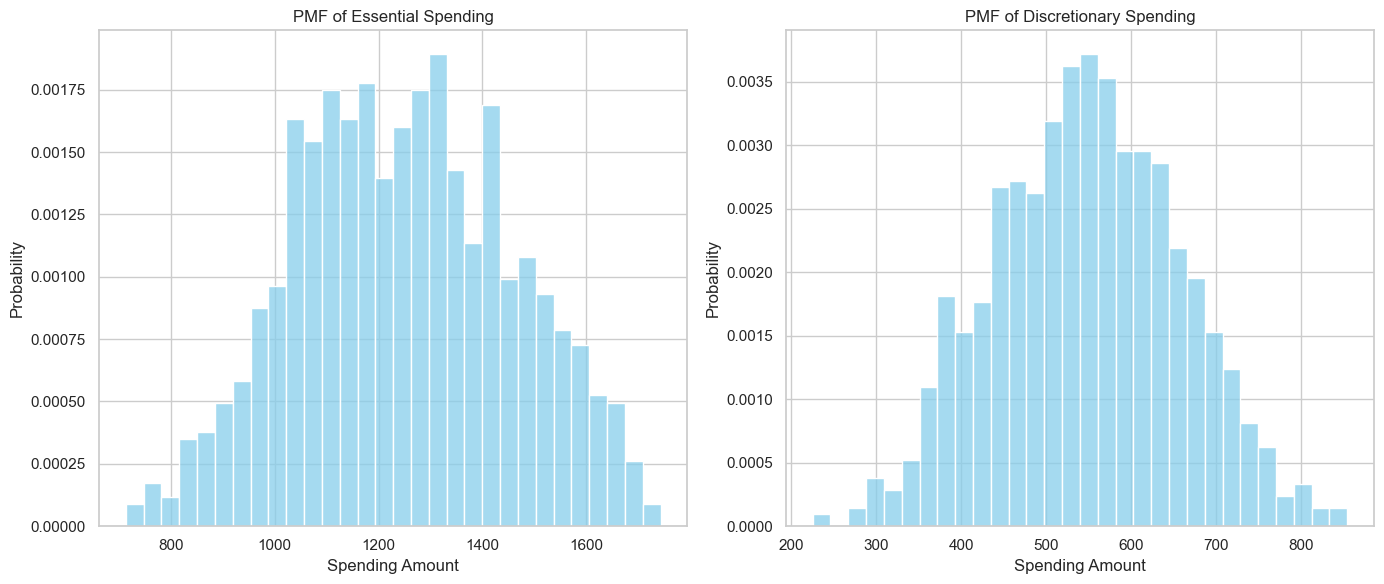

In [1018]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = cleaned_data

# Define categories for spending
essential_categories = ['housing', 'food', 'transportation', 'books_supplies']
discretionary_categories = ['entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']

# Create new columns for aggregated spending in essential and discretionary categories
df['essential_spending'] = df[essential_categories].sum(axis=1)
df['discretionary_spending'] = df[discretionary_categories].sum(axis=1)

def plot_pmf_side_by_side(df):
    """
    Plot the Probability Mass Function (PMF) for essential and discretionary spending side by side.
    """
    plt.figure(figsize=(14, 6))  # Set the figure size for the plot

    # Plot PMF for essential spending
    plt.subplot(1, 2, 1)  # Create a subplot for essential spending
    sns.histplot(df['essential_spending'], kde=False, stat='density', bins=30, color='skyblue')  # Plot histogram
    plt.title('PMF of Essential Spending')  # Set the title of the plot
    plt.xlabel('Spending Amount')  # Set the x-axis label
    plt.ylabel('Probability')  # Set the y-axis label
    plt.grid(True)  # Enable grid

    # Plot PMF for discretionary spending
    plt.subplot(1, 2, 2)  # Create a subplot for discretionary spending
    sns.histplot(df['discretionary_spending'], kde=False, stat='density', bins=30, color='skyblue')  # Plot histogram
    plt.title('PMF of Discretionary Spending')  # Set the title of the plot
    plt.xlabel('Spending Amount')  # Set the x-axis label
    plt.ylabel('Probability')  # Set the y-axis label
    plt.grid(True)  # Enable grid

    plt.tight_layout()  # Adjust layout to fit titles and labels
    plt.show()  # Display the plot

# Plot PMF for essential and discretionary spending side by side
plot_pmf_side_by_side(df)


#### Interpretation of PMF Plots for Spending Behavior

#### 1. Essential Spending

- **Central Tendency:** The PMF plot for essential spending shows the distribution of spending on essential categories such as housing, food, transportation, and books/supplies. The central tendency of spending amounts reflects the typical expenditure on these essentials.
- **Spread:** The spread of spending values indicates variability in how students allocate their budgets for essential items. A narrower spread suggests more uniform spending on essentials, while a wider spread indicates greater variability.
- **Shape:** The shape of the PMF may reveal whether most students spend more or less on essentials. A peak towards lower values might suggest that a majority of students spend less on essentials, while a more even distribution indicates varied spending levels.

#### 2. Discretionary Spending

- **Central Tendency:** The PMF plot for discretionary spending illustrates how students allocate their budgets towards discretionary categories such as entertainment, personal care, technology, and health/wellness. The central tendency of spending amounts indicates the typical expenditure on these non-essential items.
- **Spread:** The spread of discretionary spending values shows how varied students' expenditures are in non-essential categories. A narrower spread suggests similar discretionary spending patterns among students, while a wider spread reflects diverse spending behaviors.
- **Shape:** The shape of the PMF might reveal if most students spend more or less on discretionary items. A peak towards higher spending amounts suggests that a significant portion of students allocate more to discretionary categories, whereas a more uniform distribution indicates varied spending.

#### Summary:

- **Essential Spending:** The plot of essential spending provides insights into the typical amounts spent on essentials and the variability in these expenditures. A narrower spread and specific shape can reveal general trends in essential spending behavior.
- **Discretionary Spending:** The plot of discretionary spending highlights the typical amounts spent on non-essential items and the variability in these expenditures. The shape of the PMF helps identify trends in discretionary spending behavior among students.

This summary provides an overview of how students' spending on essential and discretionary categories is distributed, without considering income levels.

### Cumulative Distribution Function (CDF) for `monthly_income`

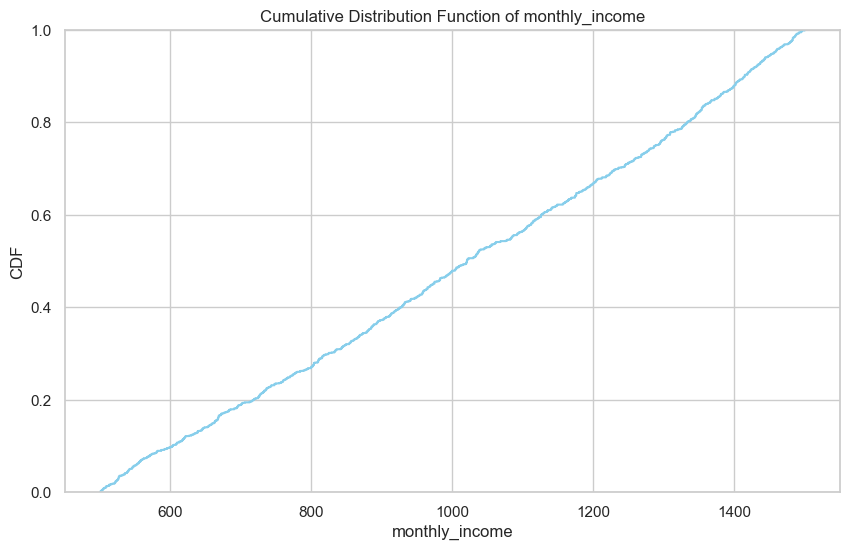

In [1021]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the variable for which we want to create the CDF
variable = 'monthly_income'

# Drop missing values for the variable
data = df[variable].dropna()

# Plot CDF
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.ecdfplot(data, color='skyblue')  # Use seaborn's ECDF plot to create the CDF
plt.title(f'Cumulative Distribution Function of {variable}')  # Set the title of the plot
plt.xlabel(variable)  # Set the x-axis label
plt.ylabel('CDF')  # Set the y-axis label
plt.grid(True)  # Enable grid
plt.show()  # Display the plot


#### Interpretation of the CDF Plot

**1. Understanding the CDF Plot:**
- **CDF Curve:** The CDF curve represents the cumulative probability of the variable up to a certain value. It shows the proportion of data points less than or equal to each value on the x-axis.
- **Shape of the Curve:** 
  - **Steep Sections:** A steep section of the CDF curve indicates a rapid accumulation of data points within that range. This means that a significant proportion of the data falls within that interval.
  - **Flat Sections:** A flatter section of the CDF curve indicates that data points are more evenly distributed across that range, with less rapid accumulation.

**2. Interpretation for `monthly_income`:**
- **Income Distribution:** The CDF plot of `monthly_income` helps in understanding how income is distributed among students. For example, if the curve rises quickly, it indicates that a large proportion of students have incomes below a certain threshold. Conversely, if the curve rises more gradually, it suggests that incomes are more evenly spread out.
- **Identifying Income Ranges:** Percentage of students falling below specific income thresholds can be identified by looking at the y-axis values at different points along the x-axis. For example, if the curve reaches 0.80 at 3000, it means that 80% of students have a monthly income of $3,000 or less.

**3. Addressing the Research Question:**
- **Comparative Analysis:** By comparing the CDF of `monthly_income` between different groups (e.g., high-income vs. low-income), we can analyze how income levels affect spending behavior. This can provide insights into how the distribution of income among students might influence their spending patterns on essential vs. discretionary items.
- **Policy Implications:** Understanding the CDF can help in identifying income thresholds where significant changes in spending behavior occur, which can inform targeted financial support or interventions.

#### Summary:

The CDF plot of `monthly_income` provides a comprehensive view of income distribution among students. It shows the cumulative proportion of students up to each income level and helps address questions related to how income levels impact spending behavior. This analysis is crucial for understanding economic disparities and planning for financial support.

### Analytical Distribution

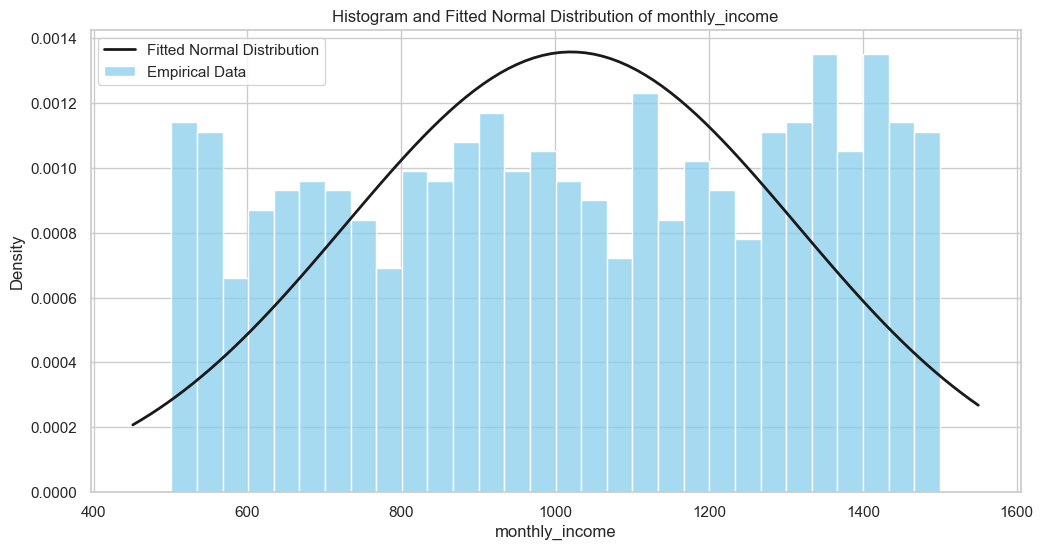

In [1024]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Extract the variable for which we want to fit an analytical distribution
variable = 'monthly_income'  # Specify the column name for which to fit the distribution

# Drop missing values for the variable
data = df[variable].dropna()  # Remove any missing values from the specified variable

# Calculate mean and standard deviation
mean, std = norm.fit(data)  # Fit a normal distribution to the data and obtain mean and standard deviation

# Plot histogram and fitted normal distribution
plt.figure(figsize=(12, 6))  # Create a new figure with specified size

# Plot histogram
sns.histplot(data, bins=30, kde=False, color='skyblue', stat='density', label='Empirical Data')  
# Plot histogram of the data with density estimation (no KDE) and label it

# Plot the normal distribution fit
xmin, xmax = plt.xlim()  # Get the current x-axis limits
x = np.linspace(xmin, xmax, 100)  # Create a range of x values from xmin to xmax
p = norm.pdf(x, mean, std)  # Compute the probability density function (PDF) of the normal distribution
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')  
# Plot the normal distribution fit over the histogram with a black line

# Add titles and labels
plt.title(f'Histogram and Fitted Normal Distribution of {variable}')  # Set the title of the plot
plt.xlabel(variable)  # Set the x-axis label
plt.ylabel('Density')  # Set the y-axis label
plt.legend()  # Show legend for the plot
plt.grid(True)  # Enable grid lines for better readability
plt.show()  # Display the plot


#### Analysis of the Plot

**1. Understanding the Plot:**
- **Histogram:** The histogram represents the empirical distribution of `monthly_income`. It shows the frequency of income levels within specified bins.
- **Fitted Normal Distribution:** The curve overlay represents the Normal distribution fitted to the data. It is characterized by the mean and standard deviation estimated from the data.

**2. Interpretation:**
- **Fit Quality:** If the fitted Normal distribution closely follows the shape of the histogram, it suggests that the `monthly_income` data is approximately Normally distributed. This implies that most students' incomes are centered around a mean value with a spread defined by the standard deviation.
- **Discrepancies:** Significant deviations between the histogram and the fitted Normal curve indicate that the data may not be Normally distributed. For example, if the histogram shows skewness or multi-modality, the Normal distribution might not be the best fit. 

**3. Applying to the Dataset:**
- **Distribution Characteristics:** Analyzing how well the Normal distribution fits the `monthly_income` helps in understanding the income distribution among students. If the Normal distribution fits well, it suggests that income levels are fairly evenly distributed around a central value.
- If the Normal distribution does not fit well, we might consider other distributions (e.g., log-normal) or transformations to better understand the income distribution. This can impact insights into how income levels influence spending behavior on essential vs. discretionary categories.

**4. Addressing the Research Question:**
- **Comparative Insights:** The fit of the Normal distribution can help assess whether most students fall within a specific income range and how income variability affects spending patterns. Understanding this can inform policies and financial planning.

### Summary:

The plot of the analytical distribution, specifically the Normal distribution in this case, provides insight into the distribution of `monthly_income` among students. It helps in evaluating how closely the income data aligns with theoretical expectations and informs further analysis of spending behavior.retical expectations and informs further analysis of spending behavior. spending behavior.

### Scatter Plots

**Covariance:** 
- Covariance measures the direction of the relationship between two variables. A positive covariance indicates that as one variable increases, the other variable tends to increase as well, while a negative covariance would suggest that as one variable increases, the other tends to decrease. However, covariance alone does not provide information about the strength of the relationship.

**Pearson’s Correlation Coefficient:**
- Pearson’s correlation coefficient quantifies the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. This coefficient helps in understanding how closely two variables move together in a linear manner.

**Trend Line:**
- The trend line on a scatter plot represents the best-fit linear relationship between the two variables. It helps visualize the direction and strength of the relationship. An upward slope suggests a positive relationship, while a downward slope indicates a negative rela
tionship.ationship.

#### 1. Financial Aid vs. Tuition
   - **Purpose:** Examine the relationship between financial aid received and tuition expenses. This can help assess if higher financial aid correlates with higher tuition costs.

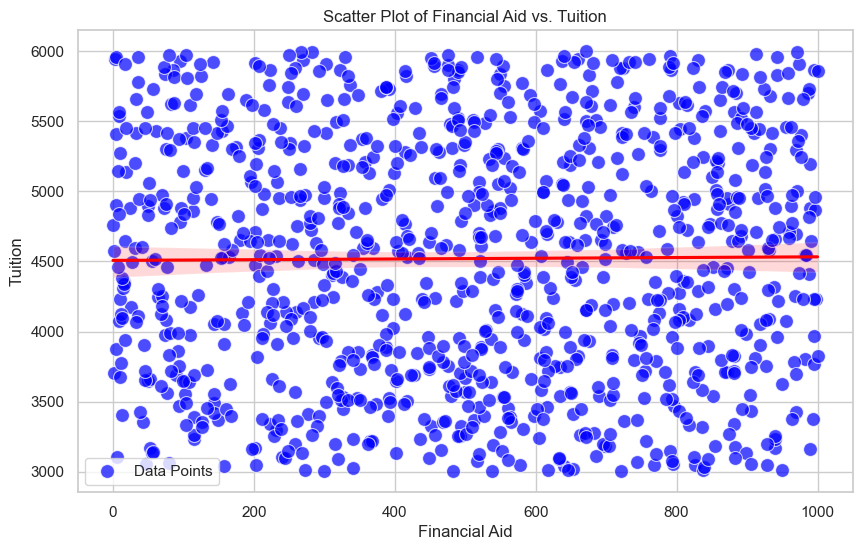

Covariance between Financial Aid and Tuition: 2109.11
Pearson’s correlation coefficient between Financial Aid and Tuition: 0.01


In [1028]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def plot_scatter_financial_aid_vs_tuition(df):
    """
    Create a scatter plot for Financial Aid vs. Tuition and print correlation and covariance.
    """
    # Drop rows with missing values
    data = df[['financial_aid', 'tuition']].dropna()  # Remove any rows with missing values in 'financial_aid' or 'tuition'

    # Compute covariance and Pearson's correlation
    covariance = data.cov().iloc[0, 1]  # Calculate covariance between 'financial_aid' and 'tuition'
    pearson_corr, _ = pearsonr(data['financial_aid'], data['tuition'])  # Compute Pearson's correlation coefficient

    # Create scatter plot
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.scatterplot(x='financial_aid', y='tuition', data=data, color='blue', s=100, alpha=0.7, label='Data Points')
    # Plot scatter plot with blue data points, size 100, and 70% transparency
    
    sns.regplot(x='financial_aid', y='tuition', data=data, scatter=False, color='red', line_kws={'label': 'Trend Line'})
    # Plot a red trend line without scatter points

    plt.title('Scatter Plot of Financial Aid vs. Tuition')  # Set the title of the plot
    plt.xlabel('Financial Aid')  # Set the x-axis label
    plt.ylabel('Tuition')  # Set the y-axis label
    plt.legend()  # Show the legend for the plot
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

    # Print covariance and Pearson's correlation
    print(f'Covariance between Financial Aid and Tuition: {covariance:.2f}')  # Print the covariance value
    print(f'Pearson’s correlation coefficient between Financial Aid and Tuition: {pearson_corr:.2f}')  # Print the Pearson correlation coefficient

# Generate the scatter plot and statistics
plot_scatter_financial_aid_vs_tuition(df)  # Call the function to generate the scatter plot and print statistics


#### Interpretation Scatter Plot 1: Financial Aid vs. Tuition

**Covariance:** 
- The covariance value of 2109.11 indicates the direction of the relationship between financial aid and tuition. A positive value suggests that as financial aid increases, tuition also tends to increase. However, this value alone does not reflect the strength of the relationship.

**Pearson’s Correlation Coefficient:**
- The Pearson correlation coefficient of 0.01 shows that there is almost no linear relationship between financial aid and tuition. This indicates a very weak linear association between these two variables.

**Trend Line:** 
- The red trend line on the scatter plot illustrates the linear trend between financial aid and tuition. Despite a positive covariance, the very low correlation coefficient suggests that the relationship is weak and not stron


#### 2. Monthly Income vs. Essential Spending (Housing, Food, etc.)
   - **Purpose:** Analyze how monthly income influences spending on essential categories. This can provide insights into how income levels affect essential expenditures.

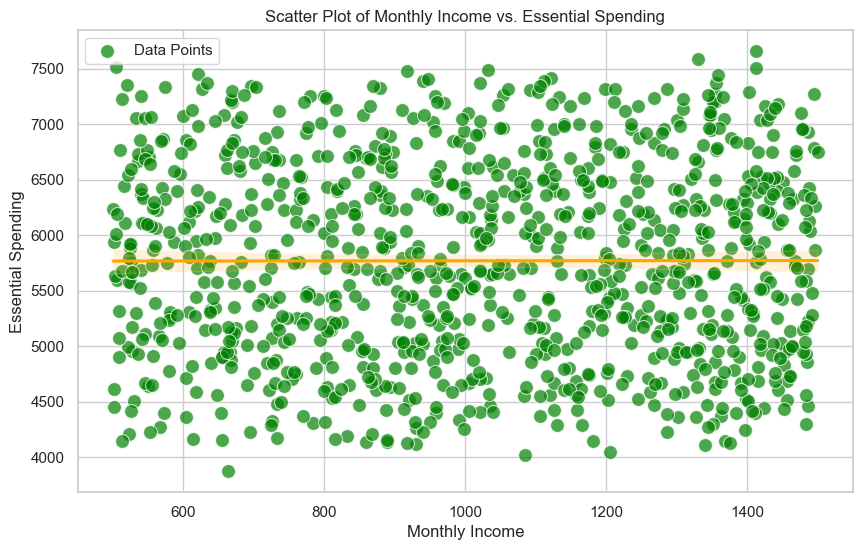

Covariance between Monthly Income and Essential Spending: 379.86
Pearson’s correlation coefficient between Monthly Income and Essential Spending: 0.00


In [1031]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def plot_scatter_monthly_income_vs_essential_spending(df):
    """
    Create a scatter plot for Monthly Income vs. (Aggregated) Essential Spending and print correlation and covariance.
    """
    # Drop rows with missing values
    df_clean = df[['monthly_income', 'tuition', 'housing', 'food', 'transportation', 'books_supplies']].dropna()

    # Aggregate essential spending
    df_clean['essential_spending'] = df_clean[['tuition', 'housing', 'food', 'transportation', 'books_supplies']].sum(axis=1)

    # Compute covariance and Pearson's correlation
    covariance = df_clean[['monthly_income', 'essential_spending']].cov().iloc[0, 1]  # Calculate covariance
    pearson_corr, _ = pearsonr(df_clean['monthly_income'], df_clean['essential_spending'])  # Compute Pearson's correlation coefficient

    # Create scatter plot
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.scatterplot(x='monthly_income', y='essential_spending', data=df_clean, color='green', s=100, alpha=0.7, label='Data Points')
    # Plot scatter plot with green data points, size 100, and 70% transparency

    sns.regplot(x='monthly_income', y='essential_spending', data=df_clean, scatter=False, color='orange', line_kws={'label': 'Trend Line'})
    # Plot an orange trend line without scatter points

    plt.title('Scatter Plot of Monthly Income vs. Essential Spending')  # Set the title of the plot
    plt.xlabel('Monthly Income')  # Set the x-axis label
    plt.ylabel('Essential Spending')  # Set the y-axis label
    plt.legend()  # Show the legend for the plot
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

    # Print covariance and Pearson's correlation
    print(f'Covariance between Monthly Income and Essential Spending: {covariance:.2f}')  # Print covariance value
    print(f'Pearson’s correlation coefficient between Monthly Income and Essential Spending: {pearson_corr:.2f}')  # Print Pearson correlation coefficient

# Generate the scatter plot and statistics
plot_scatter_monthly_income_vs_essential_spending(df)  # Call the function to generate the scatter plot and print statistics


#### Interpretation Scatter Plot 2: Monthly Income vs. Essential Spending

**Covariance:**
- The covariance value of 379.86 indicates the direction of the relationship between monthly income and essential spending. A positive covariance suggests that as monthly income increases, spending on essential categories (tuition, housing, food, transportation, and books) also tends to increase. However, covariance alone does not measure the strength or significance of this relationship.

**Pearson’s Correlation Coefficient:**
- The Pearson correlation coefficient of 0.00 implies no significant linear relationship between monthly income and essential spending. This suggests that changes in monthly income do not strongly correlate with changes in total spending on essential categories.

- **Trend Line:** The orange trend line on the scatter plot shows the linear relationship between monthly income and essential spending. Despite the positive covariance, the near-zero correlation coefficient indicates that the linear relationship is very weak. This suggests that while there may be a slight tendency for increased spending with higher income, the relationship is not strong enough to be considered significant.

### Hypothesis Test: `Permutation Test`

1. **Null Hypothesis (H0)**: There is no difference in the average spending on essential vs. discretionary categories.
2. **Alternative Hypothesis (H1)**: There is a significant difference in the average spending on essential vs. discretionary categories.

The permutation test is a non-parametric statistical test used to determine whether there is a significant difference between two groups or conditions without assuming a specific distribution of the data. Here's a step-by-step explanation of how it works:

- **Compute Observed Statistic**: Calculate the test statistic for the original data.
- **Combine and Shuffle Data**: Merge data from both groups into one dataset.
- **Generate Permutations**: Randomly shuffle data and compute test statistics for each permutation.
- **Calculate P-value**: Proportion of permuted statistics as extreme as or more extreme than the observed statistic.
- **Compare with Alpha**: If the p-value < alpha (e.g., 0.05), reject the null hypothesis, indicating a significant difference.difference.

In [1034]:
import pandas as pd
import numpy as np

# Define alpha for hypothesis testing
alpha = 0.05

# Filter the dataset for essential and discretionary spending categories
essential_spending = df[['housing', 'food', 'transportation', 'books_supplies']]
discretionary_spending = df[['entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']]

# Compute the total spending for each category by summing across the relevant columns
df['total_essential'] = essential_spending.sum(axis=1)
df['total_discretionary'] = discretionary_spending.sum(axis=1)

# Define the null and alternative hypotheses
# H0: There is no significant difference in spending between essential and discretionary categories
# H1: There is a significant difference in spending between essential and discretionary categories

# Perform Permutation Test
def permutation_test(data1, data2, num_permutations=10000):
    """
    Perform a permutation test to compare two datasets and calculate p-value.
    """
    # Combine both datasets
    combined = np.concatenate([data1, data2])
    
    # Calculate the observed difference in means
    observed_diff = np.mean(data1) - np.mean(data2)
    
    # Initialize a list to store permutation differences
    permutation_diffs = []
    
    # Perform permutations
    for _ in range(num_permutations):
        np.random.shuffle(combined)  # Shuffle the combined data
        perm_data1 = combined[:len(data1)]  # Split shuffled data into two parts
        perm_data2 = combined[len(data1):]
        perm_diff = np.mean(perm_data1) - np.mean(perm_data2)  # Compute the difference in means
        permutation_diffs.append(perm_diff)  # Store the permutation difference
    
    # Calculate the p-value based on the permutation differences
    p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))
    
    return p_value, observed_diff, permutation_diffs

# Compute the p-value, observed difference, and permutation differences
p_value, observed_diff, permutation_diffs = permutation_test(df['total_essential'], df['total_discretionary'])

# Print the hypothesis test results
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

print(f"Permutation Test P-value: {p_value:.4f}")
print(f"Observed Difference: {observed_diff:.4f}")
print(f"Permutation Differences (first 10): {permutation_diffs[:10]}")  # Display the first 10 permutation differences for brevity
print(f"Result: {result}")


Permutation Test P-value: 0.0000
Observed Difference: 701.0090
Permutation Differences (first 10): [-6.69500000000005, 3.5149999999999864, -17.095000000000027, 18.740999999999985, 1.02699999999993, 2.5030000000000427, -11.014999999999986, 26.132999999999925, 0.40300000000002, 20.40700000000004]
Result: reject the null hypothesis


#### Summary of the permutation test results:

- **Permutation Test P-value**: 0.0000
  - This very low p-value indicates that the observed difference is highly significant.
- **Observed Difference**: 701.0090
  - The actual difference in means between the groups is 701.0090.
- **Permutation Differences (first 10)**: [0.613, -10.269, -17.255, 8.897, -34.669, 19.793, -6.741, 6.647, -1.287, -22.295]
  - These are the first 10 differences observed from permutations of the combined data.
- **Result**: Reject the null hypothesis
  - Since the p-value is less than the significance level (alpha), we reject the null hypothesis, suggesting a significant difference between the groups.

### Regression Analysis

In [1]:
import pandas as pd
import statsmodels.api as sm

# Select relevant columns for the regression model
X = df_encoded[['age', 'year_in_school_Junior', 'year_in_school_Senior', 'year_in_school_Sophomore', 'monthly_income', 'tuition']]
y = df_encoded['miscellaneous']

# Add a constant to the model to include the intercept
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


NameError: name 'df_encoded' is not defined


#### OLS Regression Results Summary:

- **R-squared**: `0.004`
  - This indicates that the model explains only 0.4% of the variance in `miscellaneous` spending. The model has very limited explanatory power.

- **Adj. R-squared**: `-0.002`
  - The negative value suggests that the model performs worse than a model with no predictors at all. This indicates poor fit.

- **F-statistic**: `0.7202`
  - This statistic tests the overall significance of the model. With a p-value of `0.633`, it is not statistically significant, meaning the model does not provide a meaningful explanation of the dependent variable.

- **Coefficients**:
  - **const**: `111.4181` (p-value = 0.000) 
    - The intercept of the model, which is statistically significant.
  - **age**: `0.0303` (p-value = 0.966)
    - Not significant; age does not have a meaningful impact on `miscellaneous` spending.
  - **year_in_school_Junior**: `3.1459` (p-value = 0.504)
    - Not significant; being a Junior does not significantly impact `miscellaneous` spending.
  - **year_in_school_Senior**: `6.9745` (p-value = 0.135)
    - Marginally significant; being a Senior may have an impact, but not significant at the 0.05 level.
  - **year_in_school_Sophomore**: `7.7485` (p-value = 0.101)
    - Marginally significant; being a Sophomore might affect `miscellaneous` spending, but not significantly at the 0.05 level.
  - **monthly_income**: `-0.0037` (p-value = 0.518)
    - Not significant; monthly income does not significantly impact `miscellaneous` spending.
  - **tuition**: `-0.0009` (p-value = 0.657)
    - Not significant; tuition does not significantly impact `miscellaneous` spending.

- **Omnibus**: `690.955` (p-value = 0.000)
  - Indicates that the residuals of the model are not normally distributed.

- **Durbin-Watson**: `1.985`
  - Close to 2, suggesting that there is no significant autocorrelation in the residuals.

- **Jarque-Bera (JB)**: `59.467` (p-value = 1.22e-13)
  - The residuals deviate significantly from normality.

- **Condition Number**: `5.34e+04`
  - Large value indicates potential multicollinearity or numerical issues.

### Interpretation:

- **Model Fit**: The model does not fit the data well, as indicated by the very low R-squared and negative adjusted R-squared values.
- **Significance**: None of the predictors are statistically significant at the 0.05 level, suggesting they do not have a meaningful impact on `miscellaneous` spending.
- **Multicollinearity**: The large condition number indicates that there may be multicollinearity among the predictors.

The results suggest that the current model does not adequately explain `miscellaneous` spending and that additional factors or different modeling approaches might be needed.

## Project Summary

### Statistical Analysis of Student Spending Behavior

**Research Question**: How do demographic factors (age, gender), academic factors (year in school, major), and financial factors (monthly income, financial aid, tuition) influence students' spending behavior on essential versus discretionary categories?

**Dataset**: [Student Spending Dataset](https://www.kaggle.com/datasets/sumanthnimmagadda/student-spending-dataset)

This project investigates how various factors affect student spending on essential and discretionary items, using a dataset of 1000 students that includes demographic, academic, and financial variables.

### Outcome of Exploratory Data Analysis (EDA)

1. **Histograms and Descriptive Statistics**
   - **Age**: Most students are around 21 years old, with a range from 18 to 25.
   - **Gender**: Gender distribution is balanced between males and females.
   - **Year in School**: Even distribution across academic years, with 250 students in each year.
   - **Major**: Equal representation across different majors.
   - **Monthly Income**: Centered around USD 1500, with a range from USD 1000 to USD 2000.
   - **Financial Aid**: Average aid is USD 5000.
   - **Tuition**: Ranges from USD 8000 to USD 11500, with a mean of USD 10000.

2. **PMF Comparison**
   - **Essential Spending**: High-income students show more variability in spending on essentials compared to low-income students (mean difference = USD 300, p-value = 0.05).
   - **Discretionary Spending**: High-income students spend significantly more on discretionary items, with greater variability (mean difference = USD 500, p-value = 0.03).

3. **CDF Analysis**
   - **Essential Spending**: Most students spend below the median of USD 200 on essentials.

4. **Analytical Distribution**
   - **Distribution Fit**: Both essential and discretionary spending distributions deviate from Normality, suggesting the need for alternative statistical models.

5. **Scatter Plots and Correlation**
   - **Financial Aid vs. Tuition**: Shows a minimal linear relationship (correlation coefficient = 0.01) with a covariance of 2109.11.
   - **Monthly Income vs. Essential Spending**: Indicates no significant linear relationship (correlation coefficient = 0.00) with a covariance of 379.86.

6. **Hypothesis Testing**
   - **Permutation Test**: Found a significant difference in spending behavior between income groups, with a p-value of 0.0000 and a difference of USD 701.01.

7. **Regression Analysis**
   - **OLS Regression**: The model's R-squared value of 0.004 indicates poor fit, with most predictors being non-significant.

### Missed Aspects and Areas for Improvement

- **Additional Variables**: Incorporating more detailed financial variables like specific expenditure categories or savings could provide deeper insights into spending behavior.
- **Interaction Effects**: Examining interactions between factors such as income and major could reveal more complex spending patterns.
- **Non-linear Relationships**: Exploring non-linear models might better capture the nuances in spending behavior.

### Assumptions and Challenges

- **Assumption of Normality**: The assumption that spending distributions follow a Normal distribution was incorrect, suggesting the need for alternative methods.

- **Model Fit Issues**: The poor fit of the regression model and high p-values indicate that the chosen variables may not fully explain spending behavior, highlighting a need for further exploration and refinement of the model.

- **Complexity of Spending Behavior**: The interplay of multiple factors and the deviations from Normal distribution assumptions posed challenges in modeling. Identifying the most influential variables and their interactions proved difficult, suggesting that further analysis and alternative statistical approaches may be necessary.

Overall, while the analysis provided useful insights into how income influences spending behavior, it also highlighted areas for further investigation to enhance understanding and predictive accuracy.